In [80]:
from scipy.stats import norm
%run helpers_alg.ipynb
%run helpers_preproc.ipynb

In [150]:
mesh_dir = 'SHREC11/'
#ts = np.array([0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4])
ts = np.random.random(100) * 0.01

In [151]:
adjMats = []

for i in range(600):
    fName = 'T' + str(i) + '.obj'
    adj = obj_2_adj(mesh_dir + fName)
    adjMats.append(adj)

In [152]:
lapMats = adj_mat_to_lap_mat(adjMats)

In [153]:
evals,Us = lap_mat_to_eigen(lapMats)
hkss = batch_heat_kernel_signature(ts, evals, Us)

In [154]:
disSimMat = igl.all_pairs_distances(hkss,hkss,True)

In [155]:
disSimMat = disSimMat / np.max(disSimMat)

In [156]:
label = readLbl(mesh_dir+'labels.txt')
compResult = compareGroups(0,1,label,disSimMat)
np.mean(compResult)

0.09690295077852741

In [157]:
mat = np.empty([30,30])
compSelf = []
compOthers = []
for i in range(30):
    for j in range(0,i+1):
        compResult = compareGroups(i,j,label,disSimMat)
        mat[i,j] = compResult
        mat[j,i] = compResult
        if (i == j):
            compSelf.append(compResult)
        else:
            compOthers.append(compResult)



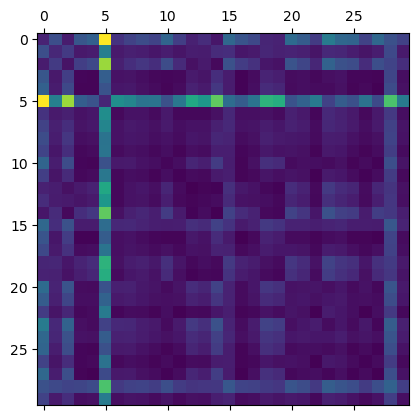

In [158]:
plt.matshow(mat)
self_mean = np.mean(compSelf)
self_std = np.std(compSelf)
others_mean = np.mean(compOthers)
others_std = np.std(compOthers)

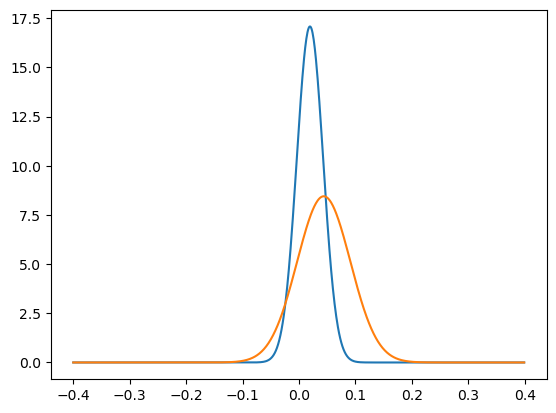

In [159]:
# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-0.4, 0.4, 0.001)

plt.plot(x_axis, norm.pdf(x_axis, self_mean, self_std))
plt.plot(x_axis, norm.pdf(x_axis, others_mean, others_std))
plt.show()

In [160]:
print(self_mean,self_std)
print(others_mean,others_std)

0.01940678589630413 0.023356413022746585
0.04385533241801677 0.047222458285698016
